# Camera Calibration
The code in this notebook will later be broken apart into separate packages. Currently, this notebook is for prototyping.

Starting the experimentation with the test images.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob
from os import path
%matplotlib inline

In [2]:
"""
Calibrate the camera given a directory containing calibration chessboards.

param dir: directory containing chessboard frames
param nx: Chessboard corners on x axis
param ny: Chessboard corners on y axis
param img_prefix: The repeating prefix used to name calibration images
param img_type: Calibration image filetype
param verbose: if True, draw and show chessboard corners
return: calibration parameters
"""
def camera_calibration(dir="camera_cal", nx=9, ny=6, img_prefix = "", img_type="jpg", verbose=False):
    assert path.exists(dir), dir + " does not exist. Need a valid directory containing calibration images"
    # 3d points in real world space
    objpoints = []
    # 2d points in image plane
    imgpoints = []
    
    #prep objpoints so it looks like (0, 0, 0), (1, 0, 0), ... (nx, ny, 0)
    # the z coordinate is always zero
    objp = np.zeros((nx*ny, 3), np.float32)
    
    # mgrid returns the coordinate values for a given grid size --> [nx, ny]
    # we are shaping the coordinates from mgrid back into 2 columns --> (x, y)
    # this is to create image points, look at distorted calibration image and detect corners
    # of board
    objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)
    
    images = glob.glob(path.join(dir,img_prefix+"*."+img_type))
    
    assert len(images) > 0, "There are no images to calibrate the camere."
    
    for file in images:
        img = cv2.imread(file)
        # convert images to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # find corners, if they exist
        ret, corners = cv2.findChessboardCorners(img, (nx, ny), None)
        
        # if corners were detected, append the points to imgpoints, and objp to objpoints
        if ret:
            # print("Adding image and object points")
            # print(len(corners))
            # print(len(objp))
            imgpoints.append(corners)
            objpoints.append(objp)
            # displaying images if verbose option was set
            if verbose:
                img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
                plt.imshow(img)
                plt.show()
        
    # print(len(objpoints))
    # print(len(imgpoints))
        
    # returning hte calibration parameters
    return cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [3]:
"""
Undistort the images in the given directory.

param mtx: Camera Matrix
param dist: Distortion Coefficients
param dir: directory containing chessboard frames
param img_prefix: The repeating prefix used to name distorted images
param img_type: Distorted image filetype
"""
def undistort_images(mtx, dist, dir="test_images", img_prefix = "", img_type="jpg"):
    assert path.exists(dir), dir + " does not exist. Need a valid directory containing distorted images"
    
    # reading all filenames of distorted images
    images = glob.glob(path.join(dir, img_prefix + "*." + img_type))
    assert len(images) > 0, "There are no images to undistort the camere."
    
    for file in images:
        img = cv2.imread(file)
        undistort = cv2.undistort(img, mtx, dist, None, mtx)
        
        fig, ax = plt.subplots(nrows=1, ncols=2)
        ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[1].imshow(cv2.cvtColor(undistort, cv2.COLOR_BGR2RGB))
        plt.show()

"""
Undistort the given image.

param img: Distorted Image
param mtx: Camera Matrix
param dist: Distortion Coefficients
return: Undistorted Image
"""
def undistort_image(img, mtx, dist):
    return cv2.undistort(img, mtx, dist, None, mtx)


# Displaying the Calibration Images with Corners Drawn

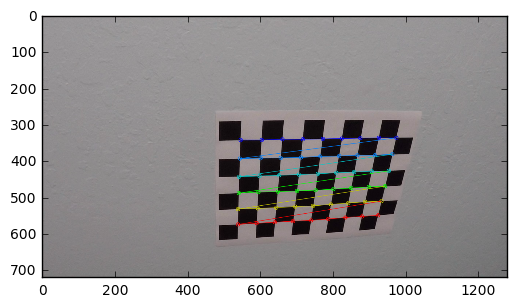

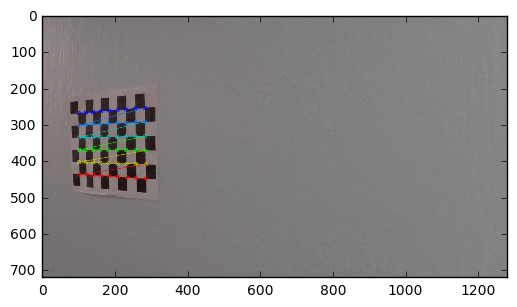

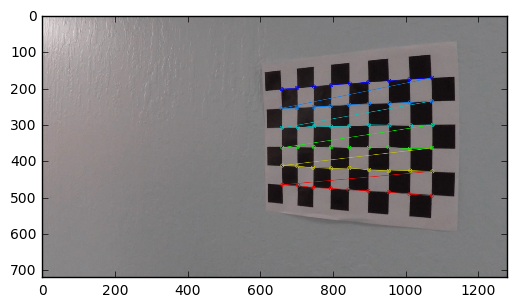

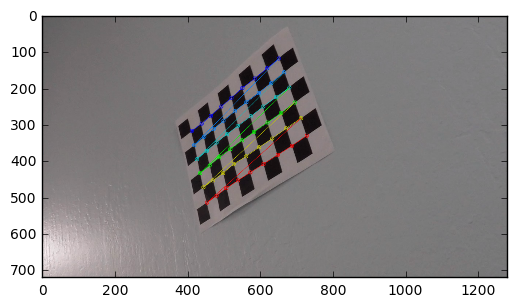

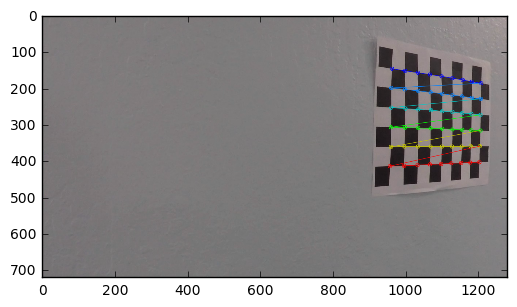

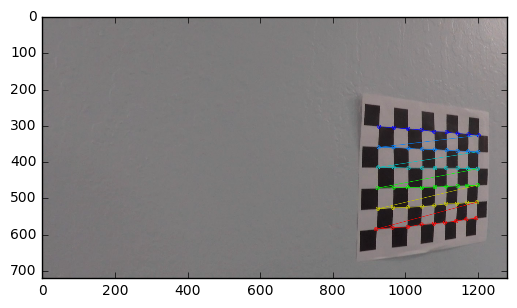

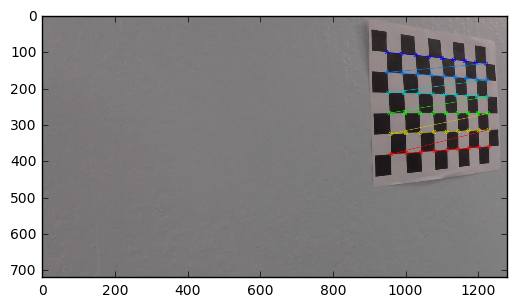

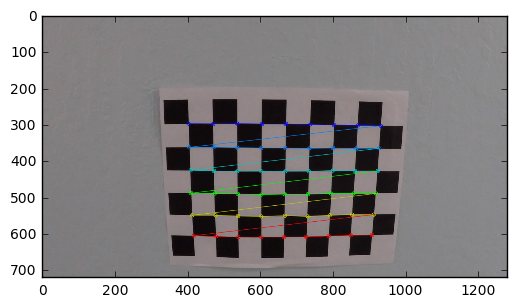

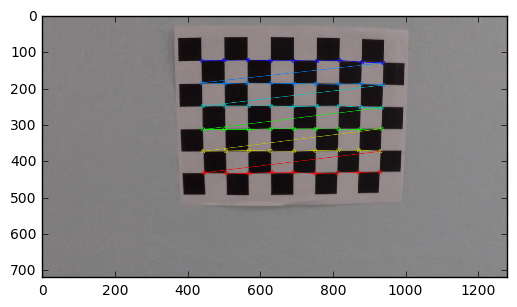

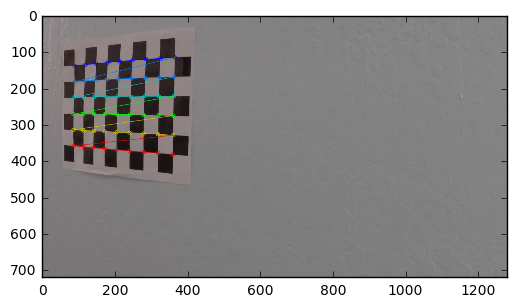

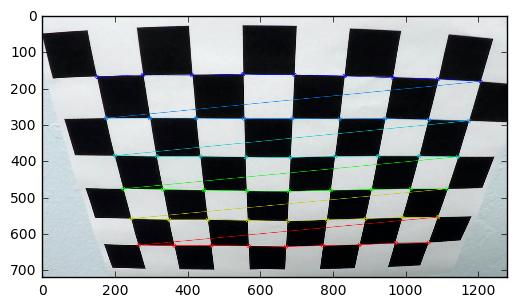

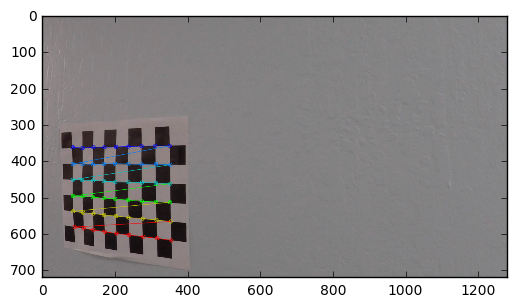

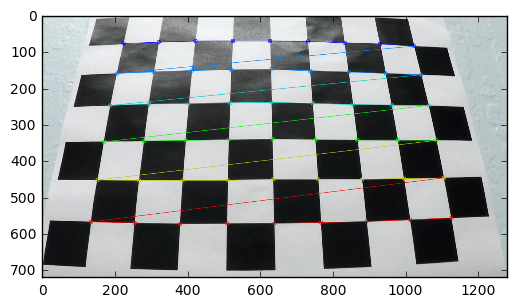

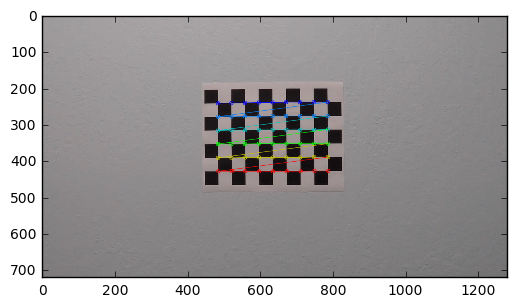

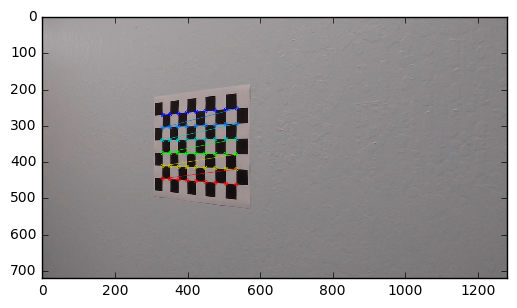

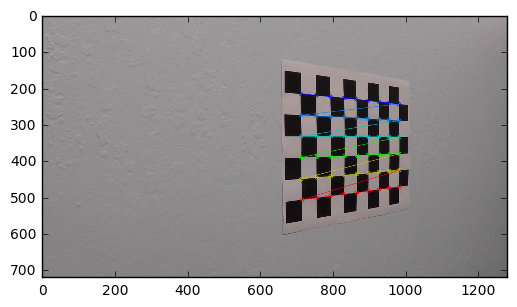

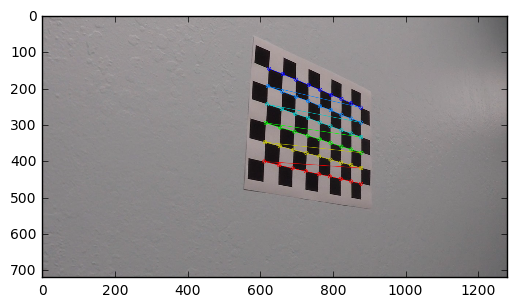

In [4]:
ret, mtx, dist, rvecs, tvecs = camera_calibration(verbose=True)

# Displaying undistorted images

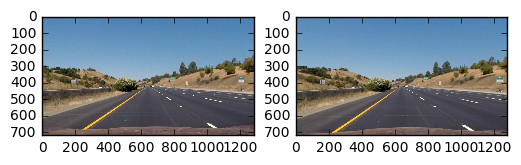

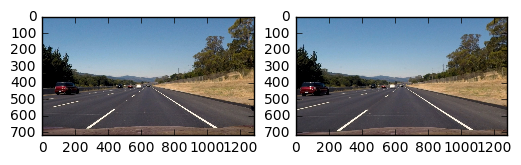

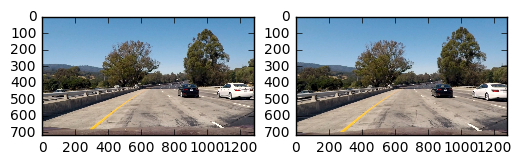

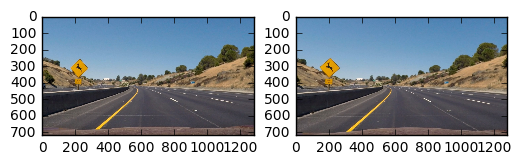

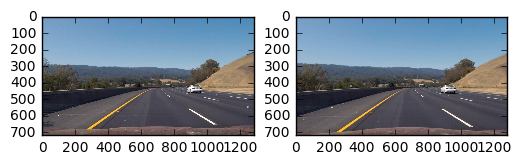

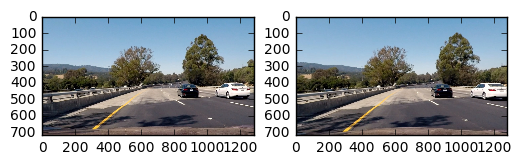

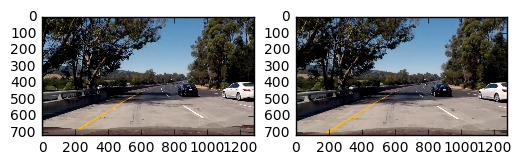

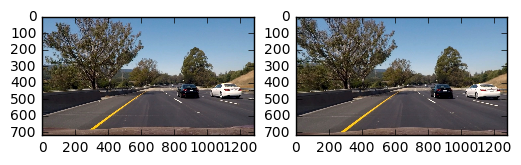

In [5]:
undistort_images(mtx, dist)

# Perspective Transform
Going to implement a perspective trasform here. This will be used to find the lanes and their curvature.

In [ ]:
def binar